In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io, integrate, linalg, signal
from scipy.linalg import lu_factor, lu_solve


def newton_method_nd(f,Jf,x0,tol,nmax,verb=False):

    # Initialize arrays and function value
    xn = x0; #initial guess
    rn = x0; #list of iterates
    Fn = f(xn); #function value vector
    n=0;
    nf=1; nJ=0; #function and Jacobian evals
    npn=1;

    if (len(x0)<100):
        if (np.linalg.cond(Jf(x0)) > 1e16):
            print("Error: matrix too close to singular");
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
            r=x0;
            return (r,rn,nf,nJ);

    if verb:
        print("|--n--|----xn----|---|f(xn)|---|");

    while npn>tol and n<=nmax:
        # compute n x n Jacobian matrix
        Jn = Jf(xn);
        nJ+=1;

        if verb:
            print("|--%d--|%1.7f|%1.15f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fn)));

        # Newton step (we could check whether Jn is close to singular here)
        pn = -np.linalg.solve(Jn,Fn);
        xn = xn + pn;
        npn = np.linalg.norm(pn); #size of Newton step

        n+=1;
        rn = np.vstack((rn,xn));
        Fn = f(xn);
        nf+=1;

    r=xn;

    if verb:
        if np.linalg.norm(Fn)>Tol:
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
        else:
            print("Newton method converged, n=%d, |F(xn)|=%1.1e\n" % (n,np.linalg.norm(Fn)));

    return (r,rn,nf,nJ);

def iteration_method(x0,F,J,nMax,Tol, verb = False):
    n = 0
    err = 1
    xn  = x0
    Fx = F(xn)
    if verb:
            print("|--%d--|%1.7f|%1.15f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fx)));
    while n<nMax and err > Tol:
        Fx = F(xn)
        xn1 = xn - J@Fx
        n+=1
        err = np.linalg.norm(xn1-xn)
        xn = xn1
        if verb:
            print("|--%d--|%1.7f|%1.15f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fx)));
    if verb:
        if np.linalg.norm(xn)>Tol:
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nMax,np.linalg.norm(Fx)));
        else:
            print("Newton method converged, n=%d, |F(xn)|=%1.1e\n" % (n,np.linalg.norm(Fx)));
    
    return xn,n

In [2]:
# Problem 1
def F(x):
        return np.array([3*x[0]**2-x[1]**2 , 3*x[0]*x[1]**2-x[0]**3-1 ]);
J= np.array([[1/6 , 1/18],[0,1/6]]);

x0 = np.array([1,1]); Tol=1e-14; nMax=200;
xn,n = iteration_method(x0,F,J,nMax,Tol, verb = True);
print(xn)

def Jf(x):
    return np.array([[6*x[0] , -2*x[1]],[3*x[1]**2-3*x[1]**2,6*x[0]*x[1]]])

r,rn,nf,nJ = newton_method_nd(F,Jf,x0,Tol,nMax,verb=False)



|--0--|1.4142136|2.236067977499790|
|--1--|1.0333931|2.236067977499790|
|--2--|0.9854263|0.428288582552082|
|--3--|0.9784174|0.193214784119840|
|--4--|0.9826386|0.105586104532527|
|--5--|0.9886877|0.061515150677243|
|--6--|0.9935708|0.035272192279460|
|--7--|0.9967557|0.019213184843074|
|--8--|0.9985625|0.009840449906376|
|--9--|0.9994711|0.004752428255539|
|--10--|0.9998718|0.002205210001617|
|--11--|1.0000180|0.001034541070698|
|--12--|1.0000527|0.000530086718371|
|--13--|1.0000469|0.000301784696296|
|--14--|1.0000318|0.000178161887839|
|--15--|1.0000185|0.000102471207370|
|--16--|1.0000095|0.000055946531822|
|--17--|1.0000043|0.000028794785431|
|--18--|1.0000017|0.000013996646009|
|--19--|1.0000005|0.000006514031506|
|--20--|1.0000000|0.000003025690953|
|--21--|0.9999999|0.000001512438618|
|--22--|0.9999999|0.000000844997821|
|--23--|0.9999999|0.000000498214750|
|--24--|0.9999999|0.000000289106069|
|--25--|1.0000000|0.000000159795751|
|--26--|1.0000000|0.000000083312484|
|--27--|1.0

|--n--|----xn----|---|f(xn)|---|
|--0--|1.7320508|7.000000000000000|
|--1--|2.2978910|1.451101928374658|
|--2--|2.2148037|0.031397974636263|
|--3--|2.2129267|0.000016043737379|
|--4--|2.2129257|0.000000000004199|
[1.09364232 1.36032838 1.36032838]
4


Text(0.5, 1.0, 'Log of error per iteration')

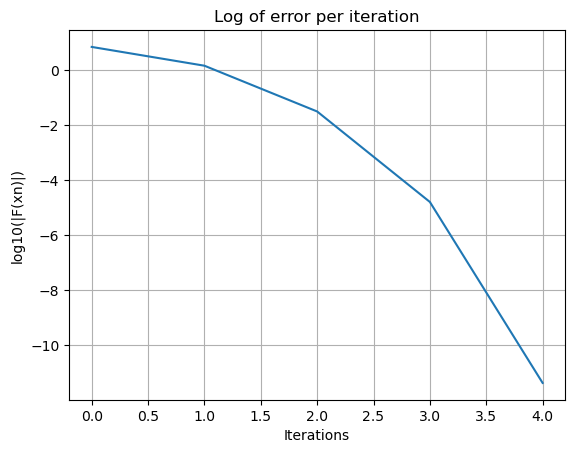

In [17]:
# Problem 3
def F(x):
    return np.array([x[0]**2 + 4*x[1]**2 + 4*x[2]**2-16])
    
def gradF(x):
    return np.array([2*x[0],8*x[1],8*x[2]])
    
def gradient_ascent(x0,F,gradF,nMax,tol,verb = False):
    n = 0
    xseq = []
    fseq = []
    xseq.append(x0)
    fseq.append(F(x0))
    if verb:
        print("|--n--|----xn----|---|f(xn)|---|")
        print("|--%d--|%1.7f|%1.15f|" %(n,np.linalg.norm(x0),np.linalg.norm(F(x0))));
    while np.abs(F(x0))>tol and n<nMax:
        d = F(x0)/np.linalg.norm(gradF(x0))**2
        x0 = x0 - d*gradF(x0)
        n+=1
        xseq.append(x0)
        fseq.append(F(x0))
        if verb:
            print("|--%d--|%1.7f|%1.15f|" %(n,np.linalg.norm(x0),np.linalg.norm(F(x0))));
    return x0,n,xseq,fseq

x0 = np.array([1,1,1])
nMax = 100
tol = 1e-10

x0,n,xseq,fseq = gradient_ascent(x0,F,gradF,nMax,tol,True)
print(x0)
print(n)

plt.plot(np.log10(np.abs(fseq)))

plt.grid()
plt.xlabel("Iterations")
plt.ylabel("log10(|F(xn)|)")
plt.title("Log of error per iteration")